<a href="https://colab.research.google.com/github/Rudrala/ML-Project/blob/main/hosue_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# List contents inside the folder
os.listdir("/content/House-price-prediction")


['.git', 'README.md']

In [ ]:
import zipfile
zip_path = "/content/house-prices-advanced-regression-techniques (1).zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall("/content/house-prices-data")

In [ ]:
import pandas as pd

train_df = pd.read_csv("/content/house-prices-data/train.csv")
train_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Train shape: (1460, 81)
Test shape: (1459, 80)

Train columns:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '

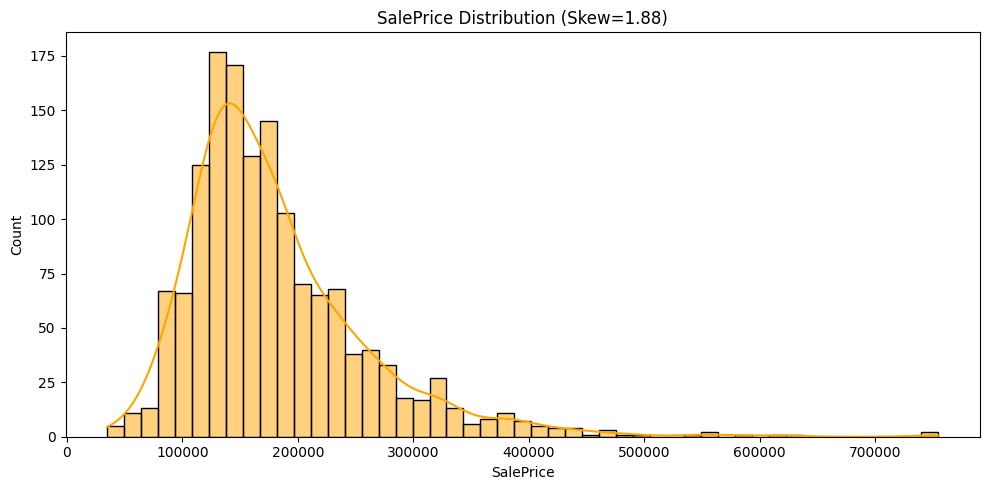

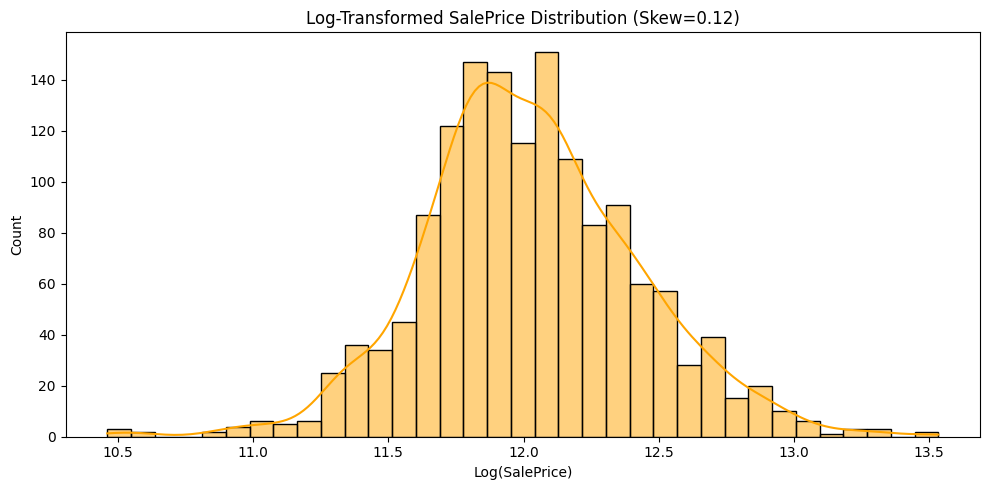


Top Correlated Features:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


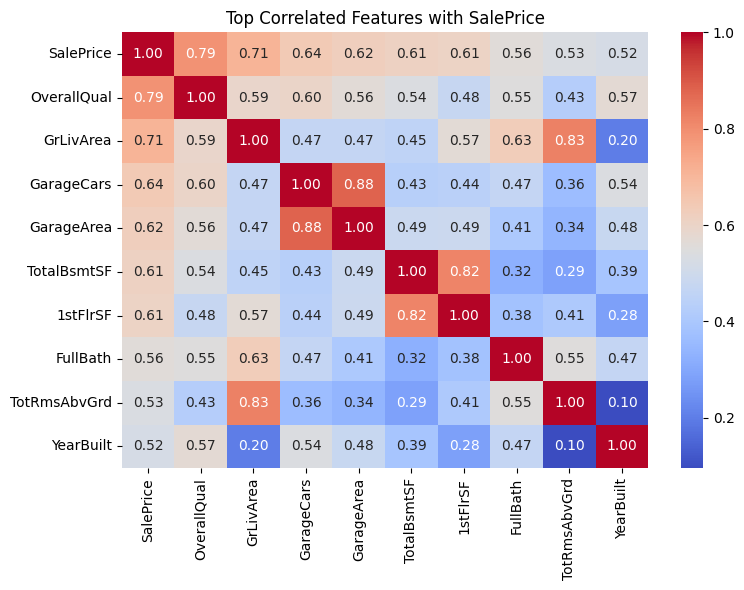

In [ ]:
# === Step 1: Import libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 2: Load data files from unzipped folder ===
train_df = pd.read_csv("/content/house-prices-data/train.csv")
test_df = pd.read_csv("/content/house-prices-data/test.csv")
sample_submission_df = pd.read_csv("/content/house-prices-data/sample_submission.csv")

# === Step 3: Basic inspection ===
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nTrain columns:\n", train_df.columns.tolist())

print("\nMissing values (train):\n", train_df.isnull().sum().sort_values(ascending=False).head(10))
print("\nMissing values (test):\n", test_df.isnull().sum().sort_values(ascending=False).head(10))

# === Step 4: Target variable analysis ===
saleprice = train_df['SalePrice']

# Plot original SalePrice distribution
plt.figure(figsize=(10, 5))
sns.histplot(saleprice, kde=True, color='orange')
plt.title(f"SalePrice Distribution (Skew={saleprice.skew():.2f})")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Log-transform SalePrice and plot
saleprice_log = np.log1p(saleprice)
plt.figure(figsize=(10, 5))
sns.histplot(saleprice_log, kde=True, color='orange')
plt.title(f"Log-Transformed SalePrice Distribution (Skew={saleprice_log.skew():.2f})")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# === Step 5: Correlation heatmap ===
numeric_features = train_df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10)
print("\nTop Correlated Features:\n", top_corr)

# Plot heatmap of top correlated features
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_features[top_corr.index].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Top Correlated Features with SalePrice")
plt.tight_layout()
plt.show()


In [ ]:
# === Step 6: Drop 'Id' columns ===
train_ID = train_df['Id']
test_ID = test_df['Id']
train_df.drop("Id", axis=1, inplace=True)
test_df.drop("Id", axis=1, inplace=True)

# === Step 7: Save target variable and remove from training features ===
y = np.log1p(train_df["SalePrice"])  # Apply log(1 + x) to reduce skew
train_df.drop("SalePrice", axis=1, inplace=True)

# === Step 8: Combine train and test datasets for unified preprocessing ===
all_data = pd.concat([train_df, test_df], axis=0)

# === Step 9: Check for missing values ===
missing = all_data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("\nMissing values to handle:\n", missing.head(15))



Missing values to handle:
 PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageCond       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
dtype: int64


In [ ]:
# === Step 11: One-hot encode categorical features ===
all_data = pd.get_dummies(all_data)

# ✅ Check shape after encoding
print("Final shape after encoding:", all_data.shape)


Final shape after encoding: (2919, 287)


In [ ]:
# === Step 9: Final cleanup, model training, and prediction ===

# Split all_data back into training and test sets
X = all_data[:len(y)]
X_test = all_data[len(y):]

# Ensure all columns are numeric (coerce non-numeric to NaN)
X = X.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill any remaining NaN values as a safeguard
X.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# === Train Ridge Regression Pipeline ===
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=10))
ridge_model.fit(X, y)

# Predict test set prices and reverse the log1p transformation
preds = np.expm1(ridge_model.predict(X_test))

# === Prepare submission file ===
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": preds
})
submission.to_csv("submission.csv", index=False)
print("✅ Submission file saved as 'submission.csv'!")

# Preview top 10 predictions
print("\n🔎 Sample predictions:")
display(submission.head(10))

# Confirm file content
print("\n📁 Reading submission back for check:")
check_submission = pd.read_csv("submission.csv")
display(check_submission.head())


✅ Submission file saved as 'submission.csv'!

🔎 Sample predictions:


,Id,SalePrice
0,1461,120780.370717
1,1462,163918.116169
2,1463,182615.421769
3,1464,202367.889883
4,1465,194520.760490
5,1466,171794.299678
6,1467,177872.320695
7,1468,163821.859205
8,1469,193567.145150
9,1470,120643.840148



📁 Reading submission back for check:


,Id,SalePrice
0,1461,120780.370717
1,1462,163918.116169
2,1463,182615.421769
3,1464,202367.889883
4,1465,194520.760490


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Split X and y for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain model on training split
ridge_model.fit(X_train, y_train)

# Predict on validation set
y_pred = ridge_model.predict(X_val)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"📊 Validation Metrics:")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE : {mae:.2f}")
print(f"✅ R²  : {r2:.4f}")


📊 Validation Metrics:
✅ RMSE: 0.13
✅ MAE : 0.09
✅ R²  : 0.9154


In [ ]:
# Step 1: Configure Git identity
!git config --global user.email "jahnavirudrala@gmail.com"
!git config --global user.name "Jahnavi Rudrala"

# Step 2: Clone your GitHub repository
!git clone https://github.com/Rudrala/House-price-prediction.git

# Step 3: Move into the repo directory
%cd House-price-prediction

# Step 4: Copy your notebook from Colab to this folder
!cp "/content/house price prediction.ipynb" .

# Step 5: Commit and push
!git add .
!git commit -m "✨ Added House Price Prediction ML notebook from Colab"
!git push origin main


Cloning into 'House-price-prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/House-price-prediction
cp: cannot stat '/content/house price prediction.ipynb': No such file or directory
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
